## DATA LOADING

In [1]:
import pandas as pd
import numpy as np

In [2]:
print(np.__version__)
print(pd.__version__)

1.19.1
1.1.1


In [3]:
rank=pd.read_csv("educationdata.csv")

In [4]:
rank.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


# DATA CLEANING

In [5]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [6]:
rank.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [7]:
rank.shape

(2200, 14)

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt


array([[<AxesSubplot:title={'center':'world_rank'}>,
        <AxesSubplot:title={'center':'national_rank'}>,
        <AxesSubplot:title={'center':'quality_of_education'}>],
       [<AxesSubplot:title={'center':'alumni_employment'}>,
        <AxesSubplot:title={'center':'quality_of_faculty'}>,
        <AxesSubplot:title={'center':'publications'}>],
       [<AxesSubplot:title={'center':'influence'}>,
        <AxesSubplot:title={'center':'citations'}>,
        <AxesSubplot:title={'center':'broad_impact'}>],
       [<AxesSubplot:title={'center':'patents'}>,
        <AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

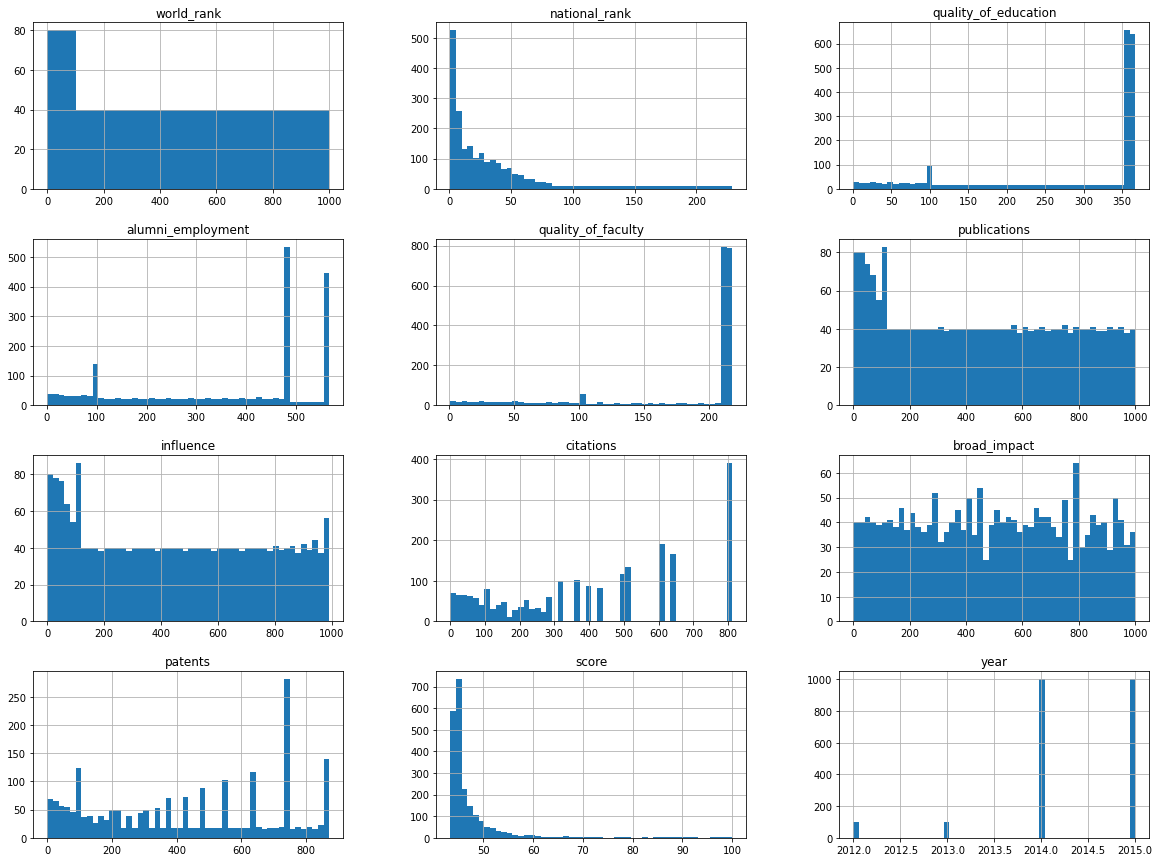

In [10]:
rank.hist(bins=50,figsize=(20,15))

In [11]:

Rank=rank.drop(["world_rank","country","year","publications","national_rank","patents","broad_impact","institution"],axis=1)

In [12]:

Rank.head()

,quality_of_education,alumni_employment,quality_of_faculty,influence,citations,score
0,7,9,1,1,1,100.00
1,9,17,3,4,4,91.67
2,17,11,5,2,2,89.50
3,10,24,4,16,11,86.17
4,2,29,7,22,22,85.21


In [13]:
corr_matrix =Rank.corr()

In [14]:
corr_matrix['score'].sort_values(ascending=False)

score                   1.000000
alumni_employment      -0.510374
citations              -0.522438
influence              -0.522837
quality_of_education   -0.600541
quality_of_faculty     -0.693540
Name: score, dtype: float64

array([[<AxesSubplot:xlabel='score', ylabel='score'>,
        <AxesSubplot:xlabel='quality_of_education', ylabel='score'>,
        <AxesSubplot:xlabel='quality_of_faculty', ylabel='score'>,
        <AxesSubplot:xlabel='citations', ylabel='score'>,
        <AxesSubplot:xlabel='influence', ylabel='score'>,
        <AxesSubplot:xlabel='alumni_employment', ylabel='score'>],
       [<AxesSubplot:xlabel='score', ylabel='quality_of_education'>,
        <AxesSubplot:xlabel='quality_of_education', ylabel='quality_of_education'>,
        <AxesSubplot:xlabel='quality_of_faculty', ylabel='quality_of_education'>,
        <AxesSubplot:xlabel='citations', ylabel='quality_of_education'>,
        <AxesSubplot:xlabel='influence', ylabel='quality_of_education'>,
        <AxesSubplot:xlabel='alumni_employment', ylabel='quality_of_education'>],
       [<AxesSubplot:xlabel='score', ylabel='quality_of_faculty'>,
        <AxesSubplot:xlabel='quality_of_education', ylabel='quality_of_faculty'>,
        <AxesSu

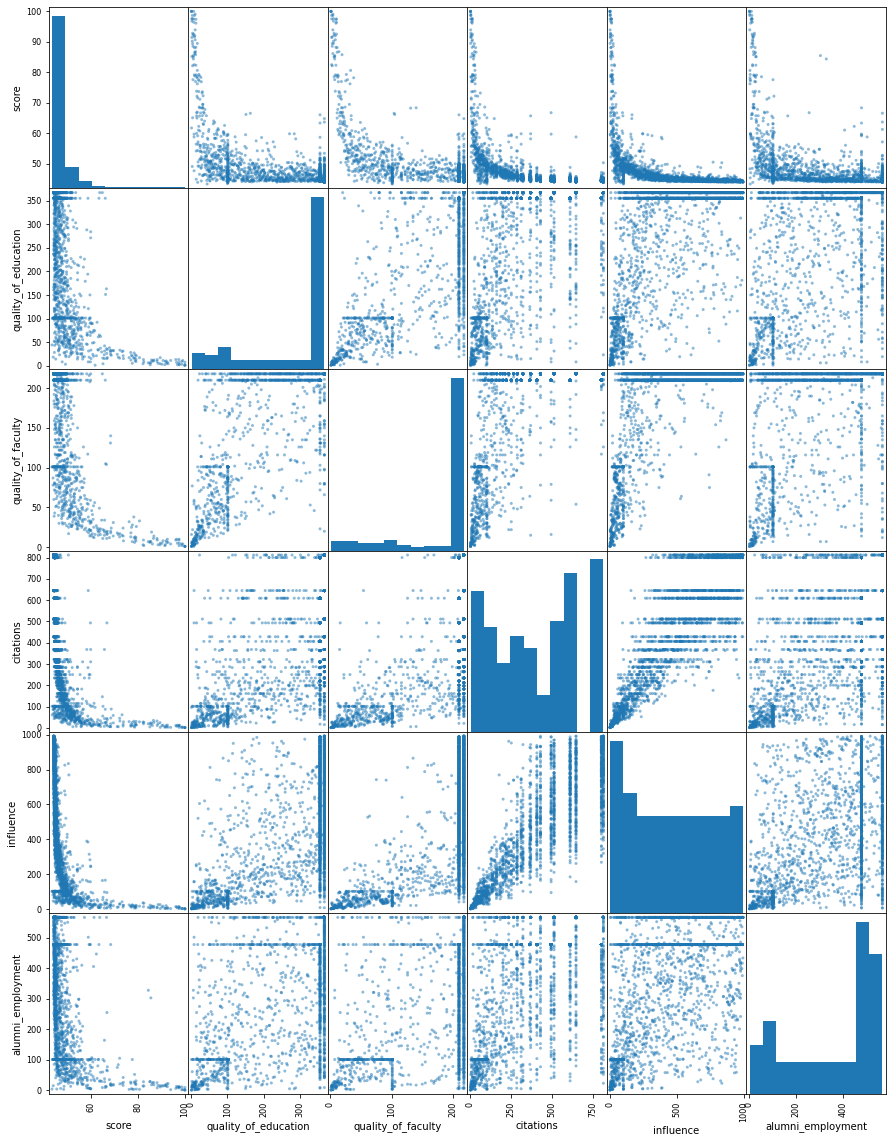

In [15]:
from pandas.plotting import scatter_matrix

attributes=['score','quality_of_education','quality_of_faculty','citations','influence','alumni_employment']
scatter_matrix(Rank[attributes],figsize = (15,20))

<AxesSubplot:xlabel='quality_of_faculty', ylabel='score'>

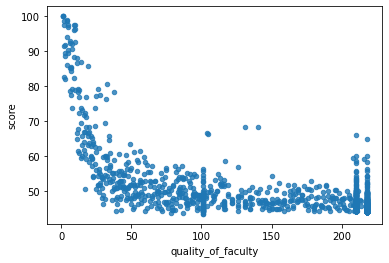

In [16]:
Rank.plot(kind="scatter",x="quality_of_faculty",y="score",alpha=0.8)

In [17]:
Rank['score']=Rank.score.astype(int)
Rank['score']

0       100
1        91
2        89
3        86
4        85
       ... 
2195     44
2196     44
2197     44
2198     44
2199     44
Name: score, Length: 2200, dtype: int32

In [18]:
Rank.dtypes

quality_of_education    int64
alumni_employment       int64
quality_of_faculty      int64
influence               int64
citations               int64
score                   int32
dtype: object

In [19]:
Rank['score']

0       100
1        91
2        89
3        86
4        85
       ... 
2195     44
2196     44
2197     44
2198     44
2199     44
Name: score, Length: 2200, dtype: int32

In [20]:
Y=Rank['score']
Y

0       100
1        91
2        89
3        86
4        85
       ... 
2195     44
2196     44
2197     44
2198     44
2199     44
Name: score, Length: 2200, dtype: int32

In [21]:
Y=np.arange(0,2200)
Y

array([   0,    1,    2, ..., 2197, 2198, 2199])

In [22]:
Y.ndim

1

In [23]:
Y=Y.reshape(-1,1)
Y.shape

(2200, 1)

In [24]:
Y.ndim

2

In [25]:
np.array(Y)

array([[   0],
       [   1],
       [   2],
       ...,
       [2197],
       [2198],
       [2199]])

# TESTING AND TRAINING

In [26]:

from sklearn.ensemble import RandomForestRegressor
import pickle
import warnings
warnings.filterwarnings("ignore")

In [27]:
from sklearn import model_selection
X=Rank.drop(['score'],axis=1)
Y=Rank['score']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [28]:
X_train.shape

(1540, 5)

In [29]:
X_test.shape

(660, 5)

In [30]:
Y_train.shape

(1540,)

In [31]:
Y_test.shape

(660,)

## MODEL

In [32]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [33]:
predictions=reg.predict(X_test)

predictions


array([46.7       , 46.67      , 44.79      , 44.01      , 44.32      ,
       44.        , 44.        , 45.19      , 44.34      , 44.63      ,
       45.21      , 44.11      , 44.08      , 44.        , 44.01      ,
       44.47      , 44.2       , 46.59      , 44.79      , 44.82      ,
       44.04      , 44.31      , 44.82      , 44.26      , 50.98      ,
       44.        , 44.89      , 44.74      , 47.        , 54.34      ,
       44.        , 45.25      , 44.        , 44.02      , 44.1       ,
       44.11      , 44.        , 53.66      , 51.18      , 47.63      ,
       44.14      , 44.        , 44.09      , 51.65      , 45.54      ,
       47.74      , 47.05      , 44.        , 46.22      , 76.38      ,
       44.22      , 44.        , 53.07      , 44.77      , 44.        ,
       47.08      , 44.        , 45.34      , 44.09      , 44.43      ,
       49.55      , 44.14      , 44.        , 44.62      , 44.01      ,
       46.97      , 44.16      , 44.45      , 46.11      , 47.07

## EVALUATION

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
l=cross_val_score(reg,X_test,Y_test,scoring="neg_mean_squared_error",cv=10)
lr=np.sqrt(-l)
lr

array([1.4302744 , 1.3218496 , 1.59531369, 1.20085891, 4.26311524,
       1.7245074 , 2.19990702, 1.82749995, 1.21777243, 0.78095513])

In [36]:
lr.mean()

1.756205375286435

In [37]:
lr.std()

0.9142084410868383

In [38]:
Y_test

1451    46
1334    49
1761    44
1735    44
1576    45
        ..
398     47
584     45
1702    44
292     51
1344    48
Name: score, Length: 660, dtype: int32

In [39]:
from sklearn.metrics import r2_score
num=r2_score(Y_test,predictions)
num

0.9615449528454263

## PREDICTION

In [40]:
print(X_test[0:5],Y_test[0:5])

      quality_of_education  alumni_employment  quality_of_faculty  influence  \
1451                   367                334                 218        184   
1334                   367                567                 218        361   
1761                   367                567                 218        400   
1735                   367                567                 218        629   
1576                   367                567                 218        322   

      citations  
1451        136  
1334        212  
1761        368  
1735        511  
1576        511   1451    46
1334    49
1761    44
1735    44
1576    45
Name: score, dtype: int32


In [41]:
#testing the build model 
test=[[367       ,         334           ,      218      ,  184, 136 ]]
print(test)

#print(log_reg.predict_proba(test))
print(reg.predict(test))  # pass
#print(log_reg.predict([[2,43]])) #fail


[[367, 334, 218, 184, 136]]
[46.7]


In [42]:
print ("irisDataframe.shape=",Rank.shape, " irisDataframe.size =", Rank.size)
print ("X_train.shape      =",X_train.shape, " X_train.size =", X_train.size)
print ("X_validation.shape =",X_test.shape, "  X_validation.size =", X_test.size)
print ("Y_train.shape      =",Y_train.shape, "   Y_train.size =", Y_train.size)
print ("Y_validation.shape =",Y_test.shape, "    Y_validation.size =", Y_test.size)

irisDataframe.shape= (2200, 6)  irisDataframe.size = 13200
X_train.shape      = (1540, 5)  X_train.size = 7700
X_validation.shape = (660, 5)   X_validation.size = 3300
Y_train.shape      = (1540,)    Y_train.size = 1540
Y_validation.shape = (660,)     Y_validation.size = 660


## PICKLE

In [43]:
# Saving model to disk
#Serialization  - saving the state (in memory) to file (on disk)
pickle.dump(reg,open('model.pkl','wb'))

# Loading model to compare the results
#Deserialization  - reteriving  the file (on disk) to memory (RAM)
model=pickle.load(open('model.pkl','rb'))

print(model.predict([[367       ,         334           ,      218      ,  184, 136]]))

[46.7]


## FLASK

In [ ]:

#app.py
from flask import Flask,request, url_for, redirect, render_template
import pickle
import numpy as np

app = Flask(__name__)
model=pickle.load(open('model.pkl','rb'))

@app.route('/')
def home():
    return render_template("note.html")

@app.route('/predict',methods=['POST','GET'])
def predict():
    # receive the values send by user in three text boxes thru request object -> requesst.form.values()
    
    int_features = [int(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    print(final_features)
    prediction = model.predict(final_features)
    output = round(prediction[0], 2)
    
    #prediction=model.predict_proba(final_features)
    #output='{0:.{1}f}'.format(prediction[0][1], 2)
   
    print(output )

    return render_template('note.html', pred='score probability is :  {}'.format(output))

if __name__ == '__main__':
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [04/Sep/2020 03:42:32] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Sep/2020 03:42:33] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [04/Sep/2020 03:42:46] "POST /predict HTTP/1.1" 200 -


[array([1, 1, 1, 1, 1])]
99.54
